Accuracy: 0.85


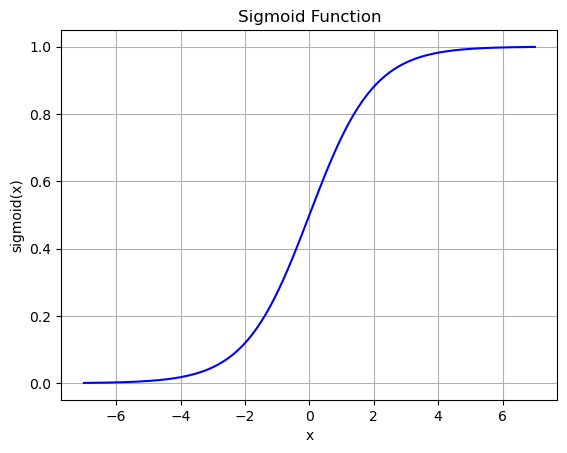

Regression Parameters using Gradient Descent: [1.35240854 0.933603  ]
Original Data:
            X          y  Target
0   30.286711  43.894998       0
1   35.847409  72.902198       0
2   60.182599  86.308552       1
3   79.032736  75.344376       1
4   45.083277  56.316372       0
..        ...        ...     ...
94  83.489163  48.380286       1
95  42.261701  87.103851       1
96  99.315009  68.775409       1
97  55.340018  64.931938       1
98  74.775893  89.529813       1

[99 rows x 3 columns]

Cleaned Data:
            X          y  Target
0   30.286711  43.894998       0
8   84.432820  43.533393       1
9   95.861555  38.225278       0
10  75.013658  30.603263       0
19  67.372028  42.838438       0
22  34.212061  44.209529       0
25  80.190181  44.821629       1
26  93.114389  38.800670       0
37  74.789253  41.573415       0
42  82.368754  40.618255       0
51  90.546714  43.390602       1
61  56.253817  39.261473       0
64  66.560894  41.092098       0
69  32.722833  43.3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# Load the local dataset
df = pd.read_csv('Student-University.csv')

#Adding columns
df.columns=['X','y','Target']

# Assuming 'X' and 'y' are the feature and target columns
X = df[['X', 'y']].values
y = df['Target'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict classes on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy}")

# Gradient Descent for Logistic Regression
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate x values
x = np.linspace(-7, 7, 200)

# Calculate corresponding y values using the sigmoid function
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y, color='b')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.show()

# Initialize parameters
theta = np.zeros(X_train.shape[1]) # Initialize parameters to zeros
alpha = 0.01 # Learning rate
num_iterations = 1000

# Perform gradient descent
for _ in range(num_iterations):
    z = np.dot(X_train, theta)
    h = sigmoid(z)
    error = h - y_train
    gradient = np.dot(X_train.T, error) / len(y_train)
    theta -= alpha * gradient

# Print the computed regression parameters
print(f'Regression Parameters using Gradient Descent: {theta}')
print("Original Data:")
print(df)

# Step 1: Removing Noise
# In this example, we'll consider any value above 10 as noise and remove it.
df = df[df['y'] <= 45]

# Step 2: Handling Missing Values (NaNs)
# In this example, we'll use mean imputation to fill missing values.
df['X'].fillna(df['X'].mean(), inplace=True)
df['y'].fillna(df['y'].mean(), inplace=True)

# Display the cleaned dataset
print("\nCleaned Data:")
print(df)